### 로지스틱 회귀
> 일반적인 선형회귀로 풀수 없는 지도학습 중 하나인 '분류' 문제를 해결하기 위한 알고리즘
> 활성화 함수로 시그모이드 함수를 사용한다.
> 

Extracting ../mnist/train-images-idx3-ubyte.gz
Extracting ../mnist/train-labels-idx1-ubyte.gz
Extracting ../mnist/t10k-images-idx3-ubyte.gz
Extracting ../mnist/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Use `tf.global_variables_initializer` instead.
Epoch: 0001 cost= 1.174406662
Epoch: 0002 cost= 0.661961771
Epoch: 0003 cost= 0.550479427
Epoch: 0004 cost= 0.496727534
Epoch: 0005 cost= 0.463699739
Epoch: 0006 cost= 0.440824241
Epoch: 0007 cost= 0.423898390
Epoch: 0008 cost= 0.410591180
Epoch: 0009 cost= 0.399882070
Epoch: 0010 cost= 0.390926550
Epoch: 0011 cost= 0.383350126
Epoch: 0012 cost= 0.376758833
Epoch: 0013 cost= 0.371010472
Epoch: 0014 cost= 0.365936794
Epoch: 0015 cost= 0.361384122
Epoch: 0016 cost= 0.357272247
Epoch: 0017 cost= 0.353554923
Epoch: 0018 cost= 0.350088185
Epoch: 0019 cost= 0.347031046
Epoch: 0020 cost= 0.344179152
Epoch: 0021 cost= 0.341420337
Epoch: 0022 cost= 0.338996688
Epoch: 0023 cost= 0.336667450
Epoch: 0024 cost= 0.334440362
Epoch: 0025 cost= 0.

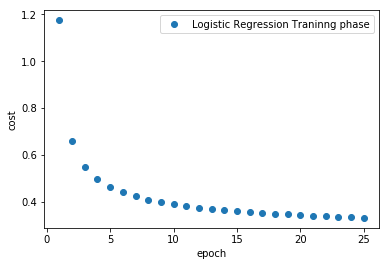

Model accuracy: 0.9136


In [14]:
import input_data
import tensorflow as tf
import matplotlib.pyplot as plt

mnist = input_data.read_data_sets("../mnist/", one_hot=True)


## 매개변수 생성
training_epochs = 25

learning_rate = 0.01
batch_size = 100
display_step =1

# 모델 생성

# 픽셀 데이터를 저장할 텐서 선언 28 * 28 의 크기를 갖는 이미지
x = tf.placeholder("float",[None,784])

# 10개의 확률 값을 저장할 텐서 선언  - 모든 확률 값의 합은 1이 되어야 한다
y = tf.placeholder("float",[None,10])

# 각 이미지에 확률값을 구하기 위해 활성함수 사용 ( 소프트맥스 )
# 소프트맥스는 특정이미지에 대한 근거를 계산, 근거를 10가지 후보 클래스에 해당하는 확률로 변환
# 28*28 인 이미지가 10개인 변수
# 근거를 평가 하기 위해 텐서 가중치를 선언 
W = tf.Variable(tf.zeros([784,10]))

# 주어진 이미지에 대해 각 클래스마다 입력 텐서 x 에 W를 곱함으로 근거를 평가 ( 가중치 )
#evidence = tf.matmul(x,W)

# 근거를 정의하기 위해 편향 텐서를 정의
b = tf.Variable(tf.zeros([10]))

# 일반적으로 모델은 불확실성 정도를 의미하는 편향에 대한 별도의 매개변수를 갖는다 ( 편향 - 바이어스)
evidence = tf.matmul(x,W) + b



# 확률 값을 갖는 출력벡터를 얻기위해 소프트 맥스를 사용 ( 활성함수라 명명)
activation = tf.nn.softmax(tf.matmul(x,W)+b)

# 모델의 성능 정도를 판단할 방법을 정해야한다
# 목표는 모델의 나쁜 정도를 나타내는 매티륵 값이 최소가 되는 매개변수 W와 b의 값을 얻고자 하는것이다.

# cross-entropy error 함수를 사용할 것이다.
cross_entropy = y * tf.log(activation)

#Cost
cost = tf.reduce_mean(-tf.reduce_sum(cross_entropy, reduction_indices=1))

#경사 하강법을 이용해 비용 최소하
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

avg_set =[]
epoch_set =[]

init = tf.initialize_all_variables()

## 세션 시작
with tf.Session() as sess:
    sess.run(init)
    
    #학습주기
    for epoch in range(training_epochs):
        avg_cost =0.
        total_batch = int(mnist.train.num_examples/batch_size)
        
        #모든 배치에 대해 반복
        for i in range(total_batch):
            batch_xs,batch_ys = mnist.train.next_batch(batch_size)
            sess.run(optimizer, feed_dict={x:batch_xs, y:batch_ys})
            avg_cost += sess.run(cost, feed_dict={x:batch_xs, y:batch_ys})/total_batch
            
        # 각 반복 단계마다 로그 출력
        if epoch % display_step ==0:
            print ("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(avg_cost))
    
        avg_set.append(avg_cost)
        epoch_set.append(epoch+1)
                
        
    print ("Training phase finished")
    plt.plot(epoch_set,avg_set, 'o', label='Logistic Regression Traninng phase')
    plt.ylabel('cost')
    plt.xlabel('epoch')
    plt.legend()
    plt.show()
        
    correct_prediction = tf.equal(tf.argmax(activation,1),tf.argmax(y,1))
        
    accuracy = tf.reduce_mean(tf.cast(correct_prediction,"float"))
    print ("Model accuracy:", accuracy.eval({ x:mnist.test.images, y:mnist.test.labels}))
        
        
                




# 실전 예제
#### 